In [124]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

## Read data

In [125]:
df = pd.read_excel('Hungary Python Data.xlsx')

In [126]:
#convert date column to datetime type
df['Dates'] = pd.to_datetime(df.Dates)

In [127]:
#set date as index
df.set_index('Dates', inplace=True)

In [128]:
df

,Hungary 10Y,Hungary 1Y,Hungary CPI YoY,HUF/USD,CT10,EUR Swap 10Y,CPI Forecast,Unemployment Rate,Trade Balance,Government Budget,...,Retail Sales,PMI SA,GKI Business Confidence Index,Industrial Production YoY,Policy Rate,Gov Budget SA,Trade Bal SA,QE Dummy,QE,PMI vs. Trend
Dates,,,,,,,,,,,,,,,,,,,,,
2014-01-31,6.077,2.950,0.0,0.00432,2.6440,1.5440,1.50,8.5,507.20,-75.4,...,5.9,57.8,3.8,6.30,2.85,-128.812500,-64.681250,0,0.00,0.000000
2014-02-28,5.991,3.155,0.1,0.00445,2.6476,1.5050,0.90,8.2,807.50,-483.3,...,6.9,54.3,4.9,7.90,2.70,-251.750000,-67.371250,0,0.00,0.000000
2014-03-31,5.536,3.005,0.1,0.00448,2.7180,1.4500,0.90,8.0,641.00,-701.2,...,8.5,53.7,4.7,8.10,2.60,-132.250000,-100.356250,0,0.00,0.000000
2014-04-30,5.370,2.605,-0.1,0.00451,2.6459,1.3730,1.20,7.8,513.00,-951.1,...,5.3,54.6,7.7,9.70,2.50,-361.262500,108.265000,0,0.00,0.000000
2014-05-30,4.711,2.420,-0.1,0.00450,2.4759,1.2283,0.60,7.9,281.00,-681.7,...,3.6,53.8,4.8,10.20,2.40,-38.225000,-203.070000,0,0.00,0.000000
2014-06-30,4.349,2.250,-0.3,0.00442,2.5304,1.1340,0.50,7.9,448.00,-813.7,...,4.9,51.7,5.4,11.60,2.30,175.150000,-277.038750,0,0.00,0.000000
2014-07-31,4.858,1.945,0.1,0.00427,2.5578,1.0500,1.60,7.8,438.00,-851.4,...,2.6,56.6,1.4,12.40,2.10,153.714286,71.311429,0,0.00,0.000000
2014-08-29,4.480,1.765,0.2,0.00417,2.3431,0.7667,1.30,7.5,434.00,-858.8,...,3.5,51.0,2.2,3.00,2.10,204.871429,126.720000,0,0.00,0.000000
2014-09-30,4.631,1.615,-0.5,0.00406,2.4888,0.8260,1.00,7.2,940.00,-844.6,...,4.3,52.7,3.6,5.50,2.10,170.828571,148.290000,0,0.00,0.000000


In [129]:
#setting start and end dates
start_date = datetime(2014, 1, 31)
end_date = datetime(2021,5,31)
lim_df = df[start_date:end_date]

In [130]:
def plot_series(series):
    plt.figure(figsize=(6,3))
    plt.plot(series, color = 'red')
    plt.ylabel(series.name, fontsize = 16)
    
    for year in range(2014, 2021):
        plt.axvline(datetime(year,1,1), linestyle = '--', color = 'k', alpha = 0.5)
    plt.show()

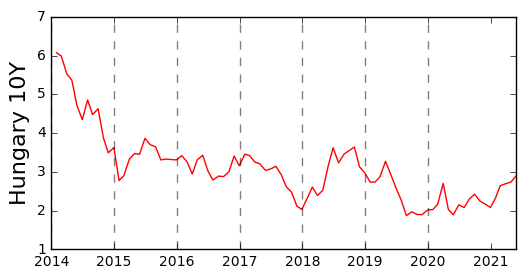

In [131]:
plot_series(lim_df['Hungary 10Y'])

## Augmented DF Test

In [132]:
def perform_adf_test(series):
    result = adfuller(series)
    print(series.name)
    print('ADF Statistic %f' % result[0])
    print('p-value: %f' % result[1])

In [133]:
#testing ADF test for dependent variable
perform_adf_test(lim_df['Hungary 10Y'])

Hungary 10Y
ADF Statistic -3.614343
p-value: 0.005493


Dependent variable is stationary

In [134]:
#exceptions for series
exc = pd.DataFrame()
exc['QE Dummy'] = lim_df['QE Dummy']
exc['Government Budget'] = lim_df['Government Budget']
exc['Policy Rate'] = lim_df['Policy Rate']
lim_df_exc = lim_df.drop(['QE Dummy', 'Government Budget', 'Policy Rate'], axis=1)

In [135]:
#create dataframe for nonstationary and stationary variables
nonstationary = pd.DataFrame()
stationary = pd.DataFrame()
for x in lim_df_exc.columns:
    result = adfuller(lim_df_exc[x])
    if result[1] > 0.05:
        nonstationary[lim_df_exc[x].name] = lim_df_exc[x]
    else:
        stationary[lim_df_exc[x].name] = lim_df_exc[x]

In [136]:
nonstationary

,Hungary CPI YoY,HUF/USD,CT10,EUR Swap 10Y,CPI Forecast,Unemployment Rate,Trade Balance,Gov Budget SA
Dates,,,,,,,,
2014-01-31,0.0,0.00432,2.6440,1.5440,1.50,8.5,507.20,-128.812500
2014-02-28,0.1,0.00445,2.6476,1.5050,0.90,8.2,807.50,-251.750000
2014-03-31,0.1,0.00448,2.7180,1.4500,0.90,8.0,641.00,-132.250000
2014-04-30,-0.1,0.00451,2.6459,1.3730,1.20,7.8,513.00,-361.262500
2014-05-30,-0.1,0.00450,2.4759,1.2283,0.60,7.9,281.00,-38.225000
2014-06-30,-0.3,0.00442,2.5304,1.1340,0.50,7.9,448.00,175.150000
2014-07-31,0.1,0.00427,2.5578,1.0500,1.60,7.8,438.00,153.714286
2014-08-29,0.2,0.00417,2.3431,0.7667,1.30,7.5,434.00,204.871429
2014-09-30,-0.5,0.00406,2.4888,0.8260,1.00,7.2,940.00,170.828571


In [137]:
stationary

,Hungary 10Y,Hungary 1Y,EM VIX,VIX,MOVE,Retail Sales,PMI SA,GKI Business Confidence Index,Industrial Production YoY,Trade Bal SA,QE,PMI vs. Trend
Dates,,,,,,,,,,,,
2014-01-31,6.077,2.950,28.90,18.41,64.7250,5.9,57.8,3.8,6.30,-64.681250,0.00,0.000000
2014-02-28,5.991,3.155,25.04,14.00,57.6628,6.9,54.3,4.9,7.90,-67.371250,0.00,0.000000
2014-03-31,5.536,3.005,22.56,13.88,61.8150,8.5,53.7,4.7,8.10,-100.356250,0.00,0.000000
2014-04-30,5.370,2.605,19.74,13.41,58.8846,5.3,54.6,7.7,9.70,108.265000,0.00,0.000000
2014-05-30,4.711,2.420,17.60,11.40,58.2950,3.6,53.8,4.8,10.20,-203.070000,0.00,0.000000
2014-06-30,4.349,2.250,15.11,11.57,52.7366,4.9,51.7,5.4,11.60,-277.038750,0.00,0.000000
2014-07-31,4.858,1.945,20.56,16.95,56.4578,2.6,56.6,1.4,12.40,71.311429,0.00,0.000000
2014-08-29,4.480,1.765,15.40,11.98,60.4894,3.5,51.0,2.2,3.00,126.720000,0.00,0.000000
2014-09-30,4.631,1.615,21.95,16.31,64.2055,4.3,52.7,3.6,5.50,148.290000,0.00,0.000000


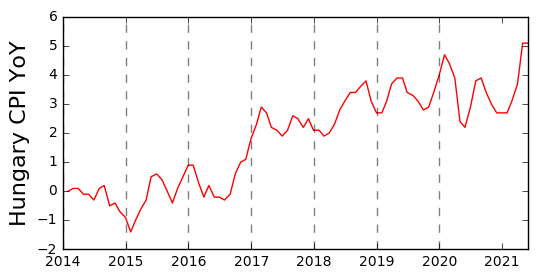

In [138]:
plot_series(lim_df['Hungary CPI YoY'])

Example of non-stationary series

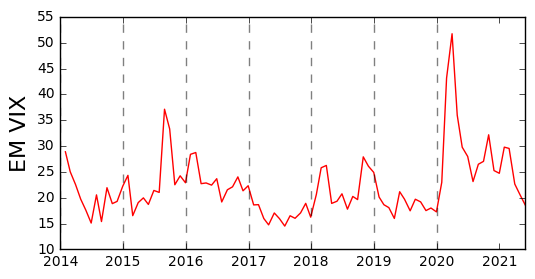

In [139]:
plot_series(lim_df['EM VIX'])

Example of stationary series

## Take first difference to remove trend

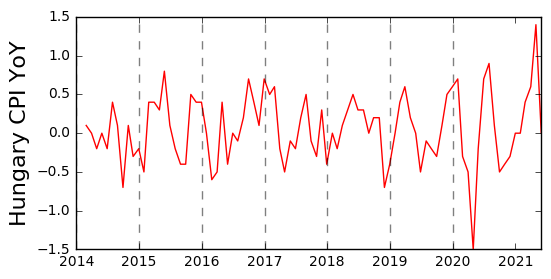

In [140]:
#testing for first nonstationary series
cpi_yoy_dif1 = lim_df['Hungary CPI YoY'].diff().dropna()
plot_series(cpi_yoy_dif1)

In [141]:
perform_adf_test(cpi_yoy_dif1)

Hungary CPI YoY
ADF Statistic -5.130987
p-value: 0.000012


first difference is stationary

In [142]:
#take first differences for each nonstationary series
firstdiff = pd.DataFrame()
for x in nonstationary.columns:
    firstdiff[nonstationary[x].name + ' d1'] = nonstationary[x].diff().dropna()

In [143]:
firstdiff

,Hungary CPI YoY d1,HUF/USD d1,CT10 d1,EUR Swap 10Y d1,CPI Forecast d1,Unemployment Rate d1,Trade Balance d1,Gov Budget SA d1
Dates,,,,,,,,
2014-02-28,0.1,0.00013,0.0036,-0.0390,-0.60,-0.3,300.30,-122.937500
2014-03-31,0.0,0.00003,0.0704,-0.0550,0.00,-0.2,-166.50,119.500000
2014-04-30,-0.2,0.00003,-0.0721,-0.0770,0.30,-0.2,-128.00,-229.012500
2014-05-30,0.0,-0.00001,-0.1700,-0.1447,-0.60,0.1,-232.00,323.037500
2014-06-30,-0.2,-0.00008,0.0545,-0.0943,-0.10,0.0,167.00,213.375000
2014-07-31,0.4,-0.00015,0.0274,-0.0840,1.10,-0.1,-10.00,-21.435714
2014-08-29,0.1,-0.00010,-0.2147,-0.2833,-0.30,-0.3,-4.00,51.157143
2014-09-30,-0.7,-0.00011,0.1457,0.0593,-0.30,-0.3,506.00,-34.042857
2014-10-31,0.1,0.00000,-0.1535,-0.0709,0.70,-0.3,-657.00,140.157143


In [144]:
#perform ADF test for first differences
for x in firstdiff.columns:
    perform_adf_test(firstdiff[x])

Hungary CPI YoY d1
ADF Statistic -5.130987
p-value: 0.000012
HUF/USD d1
ADF Statistic -8.873202
p-value: 0.000000
CT10 d1
ADF Statistic -8.821708
p-value: 0.000000
EUR Swap 10Y d1
ADF Statistic -8.872084
p-value: 0.000000
CPI Forecast d1
ADF Statistic -4.340925
p-value: 0.000377
Unemployment Rate d1
ADF Statistic -5.666471
p-value: 0.000001
Trade Balance d1
ADF Statistic -3.308887
p-value: 0.014486
Gov Budget SA d1
ADF Statistic -9.232469
p-value: 0.000000


Everything is stationary now

In [145]:
#merge stationary variables into one data frame
lim_df_sta = pd.concat([stationary,firstdiff,exc], axis=1).reindex(firstdiff.index)
lim_df_sta

,Hungary 10Y,Hungary 1Y,EM VIX,VIX,MOVE,Retail Sales,PMI SA,GKI Business Confidence Index,Industrial Production YoY,Trade Bal SA,...,HUF/USD d1,CT10 d1,EUR Swap 10Y d1,CPI Forecast d1,Unemployment Rate d1,Trade Balance d1,Gov Budget SA d1,QE Dummy,Government Budget,Policy Rate
Dates,,,,,,,,,,,,,,,,,,,,,
2014-02-28,5.991,3.155,25.04,14.00,57.6628,6.9,54.3,4.9,7.90,-67.371250,...,0.00013,0.0036,-0.0390,-0.60,-0.3,300.30,-122.937500,0,-483.3,2.70
2014-03-31,5.536,3.005,22.56,13.88,61.8150,8.5,53.7,4.7,8.10,-100.356250,...,0.00003,0.0704,-0.0550,0.00,-0.2,-166.50,119.500000,0,-701.2,2.60
2014-04-30,5.370,2.605,19.74,13.41,58.8846,5.3,54.6,7.7,9.70,108.265000,...,0.00003,-0.0721,-0.0770,0.30,-0.2,-128.00,-229.012500,0,-951.1,2.50
2014-05-30,4.711,2.420,17.60,11.40,58.2950,3.6,53.8,4.8,10.20,-203.070000,...,-0.00001,-0.1700,-0.1447,-0.60,0.1,-232.00,323.037500,0,-681.7,2.40
2014-06-30,4.349,2.250,15.11,11.57,52.7366,4.9,51.7,5.4,11.60,-277.038750,...,-0.00008,0.0545,-0.0943,-0.10,0.0,167.00,213.375000,0,-813.7,2.30
2014-07-31,4.858,1.945,20.56,16.95,56.4578,2.6,56.6,1.4,12.40,71.311429,...,-0.00015,0.0274,-0.0840,1.10,-0.1,-10.00,-21.435714,0,-851.4,2.10
2014-08-29,4.480,1.765,15.40,11.98,60.4894,3.5,51.0,2.2,3.00,126.720000,...,-0.00010,-0.2147,-0.2833,-0.30,-0.3,-4.00,51.157143,0,-858.8,2.10
2014-09-30,4.631,1.615,21.95,16.31,64.2055,4.3,52.7,3.6,5.50,148.290000,...,-0.00011,0.1457,0.0593,-0.30,-0.3,506.00,-34.042857,0,-844.6,2.10
2014-10-31,3.880,1.690,18.87,14.03,68.6910,5.0,55.0,7.8,1.80,-260.172857,...,0.00000,-0.1535,-0.0709,0.70,-0.3,-657.00,140.157143,0,-809.6,2.10


## Take lags

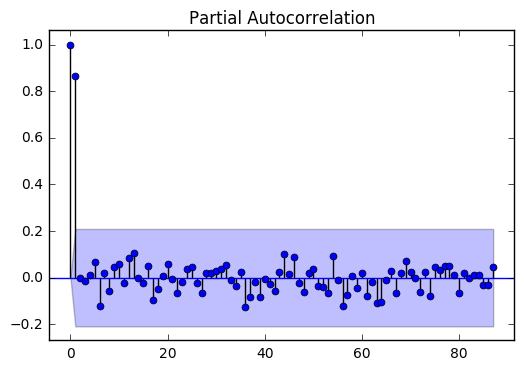

In [146]:
#Checking partial autocorrelation for Hungary 10Y
pacf_plot = plot_pacf(lim_df_sta['Hungary 10Y'])
plt.show()

In [147]:
lag_1 = pd.DataFrame()
for x in lim_df_sta.columns:
    lag_1[lim_df_sta[x].name + ' p1'] = lim_df_sta[x].shift(1).dropna()

In [148]:
lag_1

,Hungary 10Y p1,Hungary 1Y p1,EM VIX p1,VIX p1,MOVE p1,Retail Sales p1,PMI SA p1,GKI Business Confidence Index p1,Industrial Production YoY p1,Trade Bal SA p1,...,HUF/USD d1 p1,CT10 d1 p1,EUR Swap 10Y d1 p1,CPI Forecast d1 p1,Unemployment Rate d1 p1,Trade Balance d1 p1,Gov Budget SA d1 p1,QE Dummy p1,Government Budget p1,Policy Rate p1
Dates,,,,,,,,,,,,,,,,,,,,,
2014-03-31,5.991,3.155,25.04,14.00,57.6628,6.9,54.3,4.9,7.90,-67.371250,...,0.00013,0.0036,-0.0390,-0.60,-0.3,300.30,-122.937500,0.0,-483.3,2.70
2014-04-30,5.536,3.005,22.56,13.88,61.8150,8.5,53.7,4.7,8.10,-100.356250,...,0.00003,0.0704,-0.0550,0.00,-0.2,-166.50,119.500000,0.0,-701.2,2.60
2014-05-30,5.370,2.605,19.74,13.41,58.8846,5.3,54.6,7.7,9.70,108.265000,...,0.00003,-0.0721,-0.0770,0.30,-0.2,-128.00,-229.012500,0.0,-951.1,2.50
2014-06-30,4.711,2.420,17.60,11.40,58.2950,3.6,53.8,4.8,10.20,-203.070000,...,-0.00001,-0.1700,-0.1447,-0.60,0.1,-232.00,323.037500,0.0,-681.7,2.40
2014-07-31,4.349,2.250,15.11,11.57,52.7366,4.9,51.7,5.4,11.60,-277.038750,...,-0.00008,0.0545,-0.0943,-0.10,0.0,167.00,213.375000,0.0,-813.7,2.30
2014-08-29,4.858,1.945,20.56,16.95,56.4578,2.6,56.6,1.4,12.40,71.311429,...,-0.00015,0.0274,-0.0840,1.10,-0.1,-10.00,-21.435714,0.0,-851.4,2.10
2014-09-30,4.480,1.765,15.40,11.98,60.4894,3.5,51.0,2.2,3.00,126.720000,...,-0.00010,-0.2147,-0.2833,-0.30,-0.3,-4.00,51.157143,0.0,-858.8,2.10
2014-10-31,4.631,1.615,21.95,16.31,64.2055,4.3,52.7,3.6,5.50,148.290000,...,-0.00011,0.1457,0.0593,-0.30,-0.3,506.00,-34.042857,0.0,-844.6,2.10
2014-11-28,3.880,1.690,18.87,14.03,68.6910,5.0,55.0,7.8,1.80,-260.172857,...,0.00000,-0.1535,-0.0709,0.70,-0.3,-657.00,140.157143,0.0,-809.6,2.10


In [149]:
#merge all (stationary) variables into one data frame
lim_df_sta = pd.concat([lim_df_sta, lag_1], axis=1).reindex(lag_1.index)
lim_df_sta

,Hungary 10Y,Hungary 1Y,EM VIX,VIX,MOVE,Retail Sales,PMI SA,GKI Business Confidence Index,Industrial Production YoY,Trade Bal SA,...,HUF/USD d1 p1,CT10 d1 p1,EUR Swap 10Y d1 p1,CPI Forecast d1 p1,Unemployment Rate d1 p1,Trade Balance d1 p1,Gov Budget SA d1 p1,QE Dummy p1,Government Budget p1,Policy Rate p1
Dates,,,,,,,,,,,,,,,,,,,,,
2014-03-31,5.536,3.005,22.56,13.88,61.8150,8.5,53.7,4.7,8.10,-100.356250,...,0.00013,0.0036,-0.0390,-0.60,-0.3,300.30,-122.937500,0.0,-483.3,2.70
2014-04-30,5.370,2.605,19.74,13.41,58.8846,5.3,54.6,7.7,9.70,108.265000,...,0.00003,0.0704,-0.0550,0.00,-0.2,-166.50,119.500000,0.0,-701.2,2.60
2014-05-30,4.711,2.420,17.60,11.40,58.2950,3.6,53.8,4.8,10.20,-203.070000,...,0.00003,-0.0721,-0.0770,0.30,-0.2,-128.00,-229.012500,0.0,-951.1,2.50
2014-06-30,4.349,2.250,15.11,11.57,52.7366,4.9,51.7,5.4,11.60,-277.038750,...,-0.00001,-0.1700,-0.1447,-0.60,0.1,-232.00,323.037500,0.0,-681.7,2.40
2014-07-31,4.858,1.945,20.56,16.95,56.4578,2.6,56.6,1.4,12.40,71.311429,...,-0.00008,0.0545,-0.0943,-0.10,0.0,167.00,213.375000,0.0,-813.7,2.30
2014-08-29,4.480,1.765,15.40,11.98,60.4894,3.5,51.0,2.2,3.00,126.720000,...,-0.00015,0.0274,-0.0840,1.10,-0.1,-10.00,-21.435714,0.0,-851.4,2.10
2014-09-30,4.631,1.615,21.95,16.31,64.2055,4.3,52.7,3.6,5.50,148.290000,...,-0.00010,-0.2147,-0.2833,-0.30,-0.3,-4.00,51.157143,0.0,-858.8,2.10
2014-10-31,3.880,1.690,18.87,14.03,68.6910,5.0,55.0,7.8,1.80,-260.172857,...,-0.00011,0.1457,0.0593,-0.30,-0.3,506.00,-34.042857,0.0,-844.6,2.10
2014-11-28,3.493,1.655,19.30,13.33,66.5733,6.4,55.0,7.7,5.70,61.225714,...,0.00000,-0.1535,-0.0709,0.70,-0.3,-657.00,140.157143,0.0,-809.6,2.10


## Regressions

In [150]:
#correlation matrix
lim_df_sta.corr()

,Hungary 10Y,Hungary 1Y,EM VIX,VIX,MOVE,Retail Sales,PMI SA,GKI Business Confidence Index,Industrial Production YoY,Trade Bal SA,...,HUF/USD d1 p1,CT10 d1 p1,EUR Swap 10Y d1 p1,CPI Forecast d1 p1,Unemployment Rate d1 p1,Trade Balance d1 p1,Gov Budget SA d1 p1,QE Dummy p1,Government Budget p1,Policy Rate p1
Hungary 10Y,1.000000,0.735760,-0.187889,-0.314363,0.129752,0.198924,0.176560,0.318583,0.213100,0.148196,...,-0.041288,0.063218,-0.061192,0.026637,-0.369919,0.025973,0.072566,-0.326766,0.194901,0.755692
Hungary 1Y,0.735760,1.000000,0.030751,-0.013307,0.225191,-0.047853,-0.188278,-0.118031,0.068899,0.060820,...,-0.130350,-0.103916,-0.185088,-0.121564,-0.194461,-0.009907,0.041723,-0.086085,0.085570,0.881070
EM VIX,-0.187889,0.030751,1.000000,0.919085,0.337432,-0.344401,-0.625792,-0.427512,-0.341345,-0.069460,...,-0.054007,-0.162730,-0.062587,0.087572,0.173949,0.094159,0.001535,0.222868,-0.145031,-0.167842
VIX,-0.314363,-0.013307,0.919085,1.000000,0.219388,-0.445145,-0.685408,-0.549749,-0.306149,-0.134933,...,-0.074216,-0.197288,-0.097010,0.022617,0.301858,0.141244,-0.031844,0.420497,-0.266495,-0.235617
MOVE,0.129752,0.225191,0.337432,0.219388,1.000000,0.201613,-0.104188,0.067008,0.034603,0.189987,...,-0.230642,-0.112335,-0.068050,0.035748,-0.053362,0.122345,0.069531,-0.303801,0.472726,0.309872
Retail Sales,0.198924,-0.047853,-0.344401,-0.445145,0.201613,1.000000,0.484518,0.766356,0.523098,0.139347,...,0.026236,0.002023,-0.172641,-0.098405,-0.248314,0.046456,-0.099439,-0.485783,0.316018,0.193061
PMI SA,0.176560,-0.188278,-0.625792,-0.685408,-0.104188,0.484518,1.000000,0.597146,0.365933,0.362449,...,0.180740,0.242838,0.090069,-0.032455,-0.226656,-0.034678,-0.057890,-0.217850,-0.003734,0.063912
GKI Business Confidence Index,0.318583,-0.118031,-0.427512,-0.549749,0.067008,0.766356,0.597146,1.000000,0.339336,0.064916,...,0.012471,0.032742,-0.063696,0.008263,-0.285853,0.074894,0.040388,-0.664654,0.256619,0.187374
Industrial Production YoY,0.213100,0.068899,-0.341345,-0.306149,0.034603,0.523098,0.365933,0.339336,1.000000,0.167554,...,0.066681,0.179850,0.006558,-0.018826,-0.194223,0.022093,0.039110,0.201255,0.042231,0.067555
Trade Bal SA,0.148196,0.060820,-0.069460,-0.134933,0.189987,0.139347,0.362449,0.064916,0.167554,1.000000,...,0.050041,0.216740,0.007486,-0.049246,-0.297735,0.175740,-0.011735,0.096835,0.014044,0.045472


In [151]:
#concentrated correlation matrix
corr = lim_df_sta[['Hungary 10Y',
                   'Hungary 1Y',
                   'GKI Business Confidence Index',
                   'QE',
                   'Unemployment Rate d1', 
                   'Hungary 10Y p1', 
                   'Hungary 1Y p1',
                   'GKI Business Confidence Index p1']]

corr.corr()

,Hungary 10Y,Hungary 1Y,GKI Business Confidence Index,QE,Unemployment Rate d1,Hungary 10Y p1,Hungary 1Y p1,GKI Business Confidence Index p1
Hungary 10Y,1.000000,0.735760,0.318583,-0.271486,-0.368586,0.934303,0.750569,0.293683
Hungary 1Y,0.735760,1.000000,-0.118031,-0.033515,-0.157099,0.753431,0.973625,-0.084488
GKI Business Confidence Index,0.318583,-0.118031,1.000000,-0.570684,-0.247303,0.304625,-0.110112,0.909120
QE,-0.271486,-0.033515,-0.570684,1.000000,0.046066,-0.292352,-0.053815,-0.660964
Unemployment Rate d1,-0.368586,-0.157099,-0.247303,0.046066,1.000000,-0.362657,-0.158534,-0.190711
Hungary 10Y p1,0.934303,0.753431,0.304625,-0.292352,-0.362657,1.000000,0.773761,0.299628
Hungary 1Y p1,0.750569,0.973625,-0.110112,-0.053815,-0.158534,0.773761,1.000000,-0.104213
GKI Business Confidence Index p1,0.293683,-0.084488,0.909120,-0.660964,-0.190711,0.299628,-0.104213,1.000000


In [152]:
lim_df_sta.columns

Index(['Hungary 10Y', 'Hungary 1Y', 'EM VIX', 'VIX', 'MOVE', 'Retail Sales',
       'PMI SA', 'GKI Business Confidence Index', 'Industrial Production YoY',
       'Trade Bal SA', 'QE', 'PMI vs. Trend', 'Hungary CPI YoY d1',
       'HUF/USD d1', 'CT10 d1', 'EUR Swap 10Y d1', 'CPI Forecast d1',
       'Unemployment Rate d1', 'Trade Balance d1', 'Gov Budget SA d1',
       'QE Dummy', 'Government Budget', 'Policy Rate', 'Hungary 10Y p1',
       'Hungary 1Y p1', 'EM VIX p1', 'VIX p1', 'MOVE p1', 'Retail Sales p1',
       'PMI SA p1', 'GKI Business Confidence Index p1',
       'Industrial Production YoY p1', 'Trade Bal SA p1', 'QE p1',
       'PMI vs. Trend p1', 'Hungary CPI YoY d1 p1', 'HUF/USD d1 p1',
       'CT10 d1 p1', 'EUR Swap 10Y d1 p1', 'CPI Forecast d1 p1',
       'Unemployment Rate d1 p1', 'Trade Balance d1 p1', 'Gov Budget SA d1 p1',
       'QE Dummy p1', 'Government Budget p1', 'Policy Rate p1'],
      dtype='object')

In [153]:
Y = lim_df_sta['Hungary 10Y']
X = lim_df_sta[['GKI Business Confidence Index', 
                'Unemployment Rate d1',
                'Hungary 1Y'
               ]]

In [154]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Hungary 10Y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     75.14
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.39e-23
Time:                        10:43:58   Log-Likelihood:                -43.045
No. Observations:                  87   AIC:                             94.09
Df Residuals:                      83   BIC:                             104.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                             2.2839      0.066     34.413      0.000         2.152     2.416
GKI Business Confidence Index     0.0306      0.005      6.182      0.000         0.021     0.040
Unemployment Rate d1             -0.7762      0.292     -2.655      0.010        -1.358    -0.195
Hungary 1Y                        0.8746      0.068     12.905      0.000         0.740     1.009
==============================================================================
Omnibus:                        2.783   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                1.838
Skew:                           0.129   Prob(JB):                        0.399
Kurtosis:                       2.336   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
predictions = reg.predict()
residuals = Y - predictions

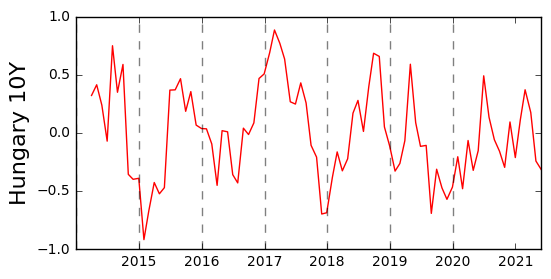

In [156]:
plot_series(residuals)

In [157]:
predictions = pd.Series(predictions, index = Y.index)

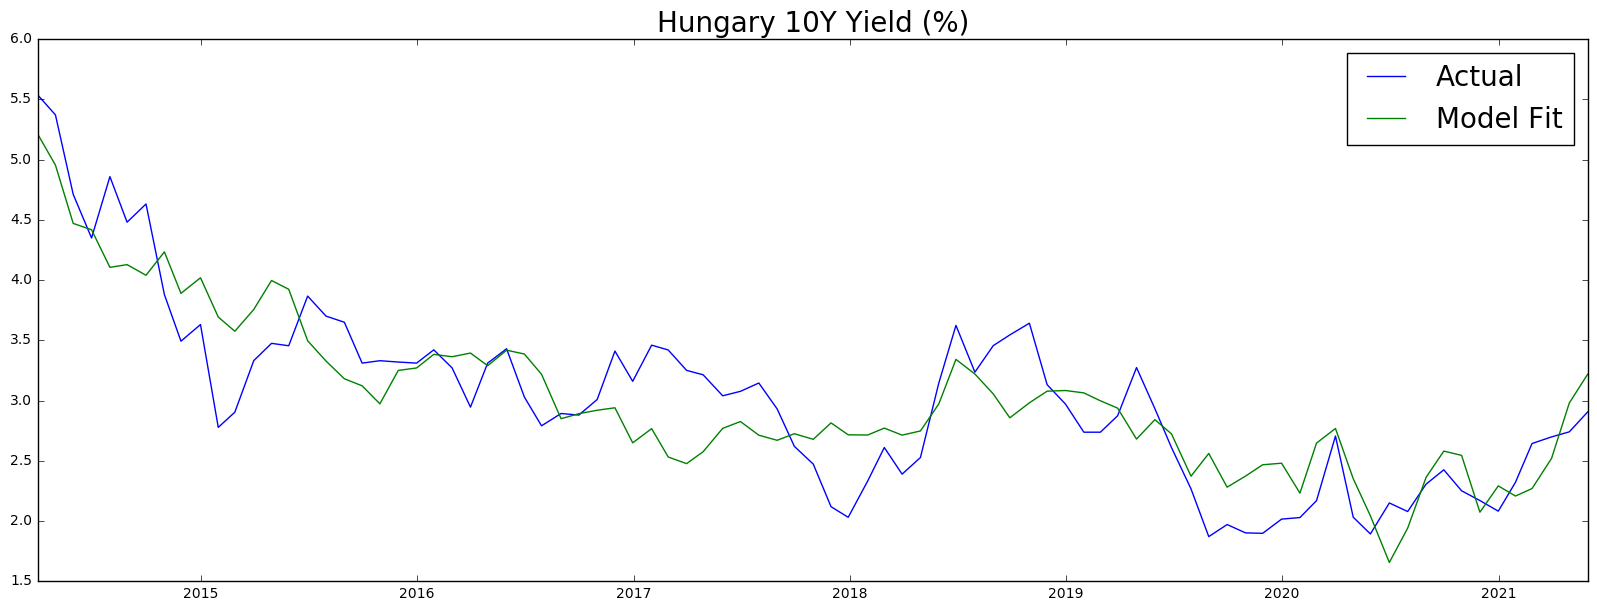

In [158]:
plt.figure(figsize=(20,7))

plt.plot(Y)
plt.plot(predictions)

plt.legend(('Actual', 'Model Fit'), fontsize = 20)
plt.title('Hungary 10Y Yield (%)', fontsize = 20)

plt.show()

## Training and Validation

In [159]:
#divide training and test data
train_end = datetime(2020,6,30)
test_end = datetime(2021,5,31)

train_data = lim_df_sta[:train_end]
test_data = lim_df_sta[train_end + timedelta(days=1):test_end]

In [196]:
test_X1 = X1[train_end + timedelta(days=1):test_end]

In [195]:
pred = model.predict(test_X1)

In [191]:
pred.shape

(11,)

In [181]:
train_data.shape

(76, 46)

In [175]:
rolling_predictions = test_data['Hungary 10Y'].copy()

In [176]:
rolling_predictions

Dates
2020-07-31    2.080
2020-08-31    2.307
2020-09-30    2.426
2020-10-30    2.252
2020-11-30    2.171
2020-12-31    2.083
2021-01-29    2.322
2021-02-26    2.644
2021-03-31    2.699
2021-04-30    2.741
2021-05-31    2.906
Name: Hungary 10Y, dtype: float64

In [123]:
rolling_predictions = test_data['Hungary 10Y'].copy()
for train_end in test_data.index:
    train_Y = Y[:train_end - timedelta(days=1)]
    train_X1 = X1[:train_end - timedelta(days=1)]
    model = sm.OLS(train_Y, train_X1).fit()
    pred = model.predict(train_X1)
    rolling_predictions[train_end] = pred

ValueError: setting an array element with a sequence.